# Binary prior

## Model

- $p(x) = p_+ \delta_+(x) + p_- \delta_-(x)$
- infer $x$ from noisy observation $r,v$ or $a=\frac{1}{v},b=\frac{r}{v}$
- $Z = \int dx\, p(x) e^{-\frac{1}{2} a x^2 + b x}$

## Posterior

In [1]:
import numpy as np
from tramp.priors import BinaryPrior
from tramp.experiments import run_experiments, qplot

def run_posterior(p_pos, r, v):
    prior = BinaryPrior(size=1, p_pos=p_pos)
    a, b = 1/v, r/v
    rx, vx = prior.compute_forward_posterior(a, b)
    return dict(a=a, b=b, rx=rx, vx=vx)

df = run_experiments(
    run_posterior, p_pos=0.5, v = [0.5, 2], r = np.linspace(-3,3,101)
)

qplot(df, x="r", y="rx", color="v")

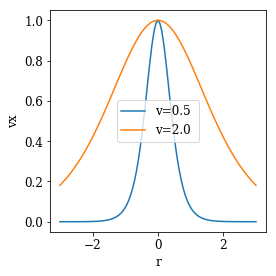

In [2]:
qplot(df, x="r", y="vx", color="v")

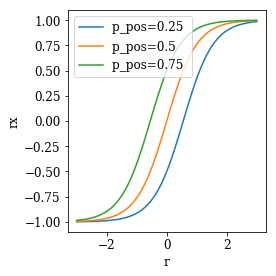

In [3]:
df = run_experiments(
    run_posterior,  p_pos=[0.25, 0.5, 0.75], v = 1, r = np.linspace(-3,3,101)
)

qplot(df, x="r", y="rx", color="p_pos")

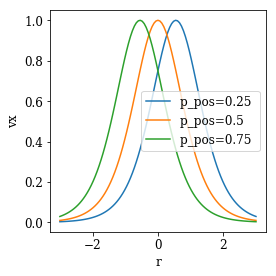

In [4]:
qplot(df, x="r", y="vx", color="p_pos")

In [5]:
df.query("r==0")

,a,b,p_pos,r,rx,v,vx
50,1.0,0.0,0.25,0.0,-0.5,1,0.75
151,1.0,0.0,0.50,0.0,0.0,1,1.00
252,1.0,0.0,0.75,0.0,0.5,1,0.75


## Error function

In [6]:
def run_error(p_pos, v):
    prior = BinaryPrior(size=1, p_pos=p_pos)
    a = 1/v
    error = prior.compute_forward_error(a)
    return dict(a=a, error=error)

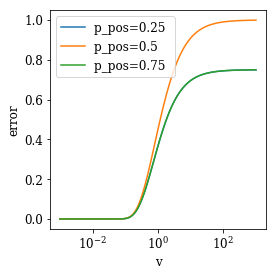

In [7]:
df = run_experiments(
    run_error,  p_pos=[0.25, 0.5, 0.75], v = 10**np.linspace(-3,3,101)
)
qplot(df, x="v", y="error", color="p_pos", xlog=True)

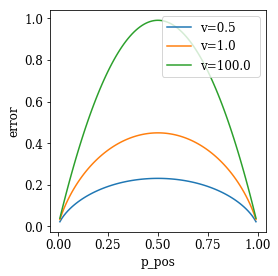

In [8]:
df = run_experiments(
    run_error, p_pos=np.linspace(0,1,101)[1:-1], v = [0.5, 1., 100.]
)
qplot(df, x="p_pos", y="error", color="v")

## Numerical stability

Seems okay

In [9]:
# test initial condition a=b=0
for p_pos in [0.5, 0.3]:
    binary = BinaryPrior(size=1, p_pos=p_pos)
    print(binary)
    print(binary.compute_forward_posterior(ax=1e-15, bx=1e-15))
    print(binary.compute_forward_posterior(ax=0, bx=0))
    print(binary.compute_forward_posterior(ax=1e-15, bx=0))
    print(binary.compute_forward_error(ax=1e-15))
    print(binary.compute_forward_error(ax=0)) # slight error but okay
    print()

BinaryPrior(size=1,p_pos=0.5)
(1e-15, 1.0)
(0.0, 1.0)
(0.0, 1.0)
0.9999999999999993
1.0000000000000002

BinaryPrior(size=1,p_pos=0.3)
(-0.39999999999999913, 0.8400000000000007)
(-0.39999999999999997, 0.8400000000000001)
(-0.39999999999999997, 0.8400000000000001)
0.8399999999999992
0.8400000000000004

